In [ ]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif
from sklearn.impute import SimpleImputer

RANDOM_STATE = 42
import warnings
warnings.filterwarnings('ignore')

In [ ]:
org_df = pd.read_csv('churning.csv')
df = org_df.copy()


In [ ]:
df.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        4250.000000                    4250.000000  
mean            2.769654                       1.559059  
std             0.745204                       1.311434  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
cat_cols = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
for c in cat_cols:
    df[c] = pd.Series(LabelEncoder().fit_transform(df[c]), dtype='category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          4250 non-null   category
 1   account_length                 4250 non-null   int64   
 2   area_code                      4250 non-null   category
 3   international_plan             4250 non-null   category
 4   voice_mail_plan                4250 non-null   category
 5   number_vmail_messages          4250 non-null   int64   
 6   total_day_minutes              4250 non-null   float64 
 7   total_day_calls                4250 non-null   int64   
 8   total_day_charge               4250 non-null   float64 
 9   total_eve_minutes              4250 non-null   float64 
 10  total_eve_calls                4250 non-null   int64   
 11  total_eve_charge               4250 non-null   float64 
 12  total_night_minutes            425

In [ ]:
df

state  account_length area_code international_plan voice_mail_plan  \
0       35             107         1                  0               1   
1       31             137         1                  0               0   
2       35              84         0                  1               0   
3       36              75         1                  1               0   
4       19             121         2                  0               1   
...    ...             ...       ...                ...             ...   
4245    26              83         1                  0               0   
4246    49              73         0                  0               0   
4247    27              75         0                  0               0   
4248    11              50         0                  0               1   
4249    46              86         1                  0               1   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                27.47              195.5              103             16.62   
1                41.38              121.2              110             10.30   
2                50.90               61.9               88              5.26   
3                28.34              148.3              122             12.61   
4                37.09              348.5              108             29.62   
...                ...                ...              ...               ...   
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   254.4                103               11.45   
1                   162.6                104                7.32   
2                   196.9                 89                8.86   
3                   186.9                121                8.41   
4                   212.6                118                9.57   
...                   ...                ...                 ...   
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7                 3               3.70   
1                   12.2                 5               3.29   
2                    6.6                 7               1.78   
3                   10.1                 3               2.73   
4                    7.5                 7               2.03   
...                  ...               ...                ...   
4245                10.3                 6               2.78   
4

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 15))
axs = axs.ravel()

for i, c in enumerate([el for el in df.columns if pd.api.types.is_numeric_dtype(df[el])]):
    sns.boxplot(df, x=c, orient='h', ax = axs[i])

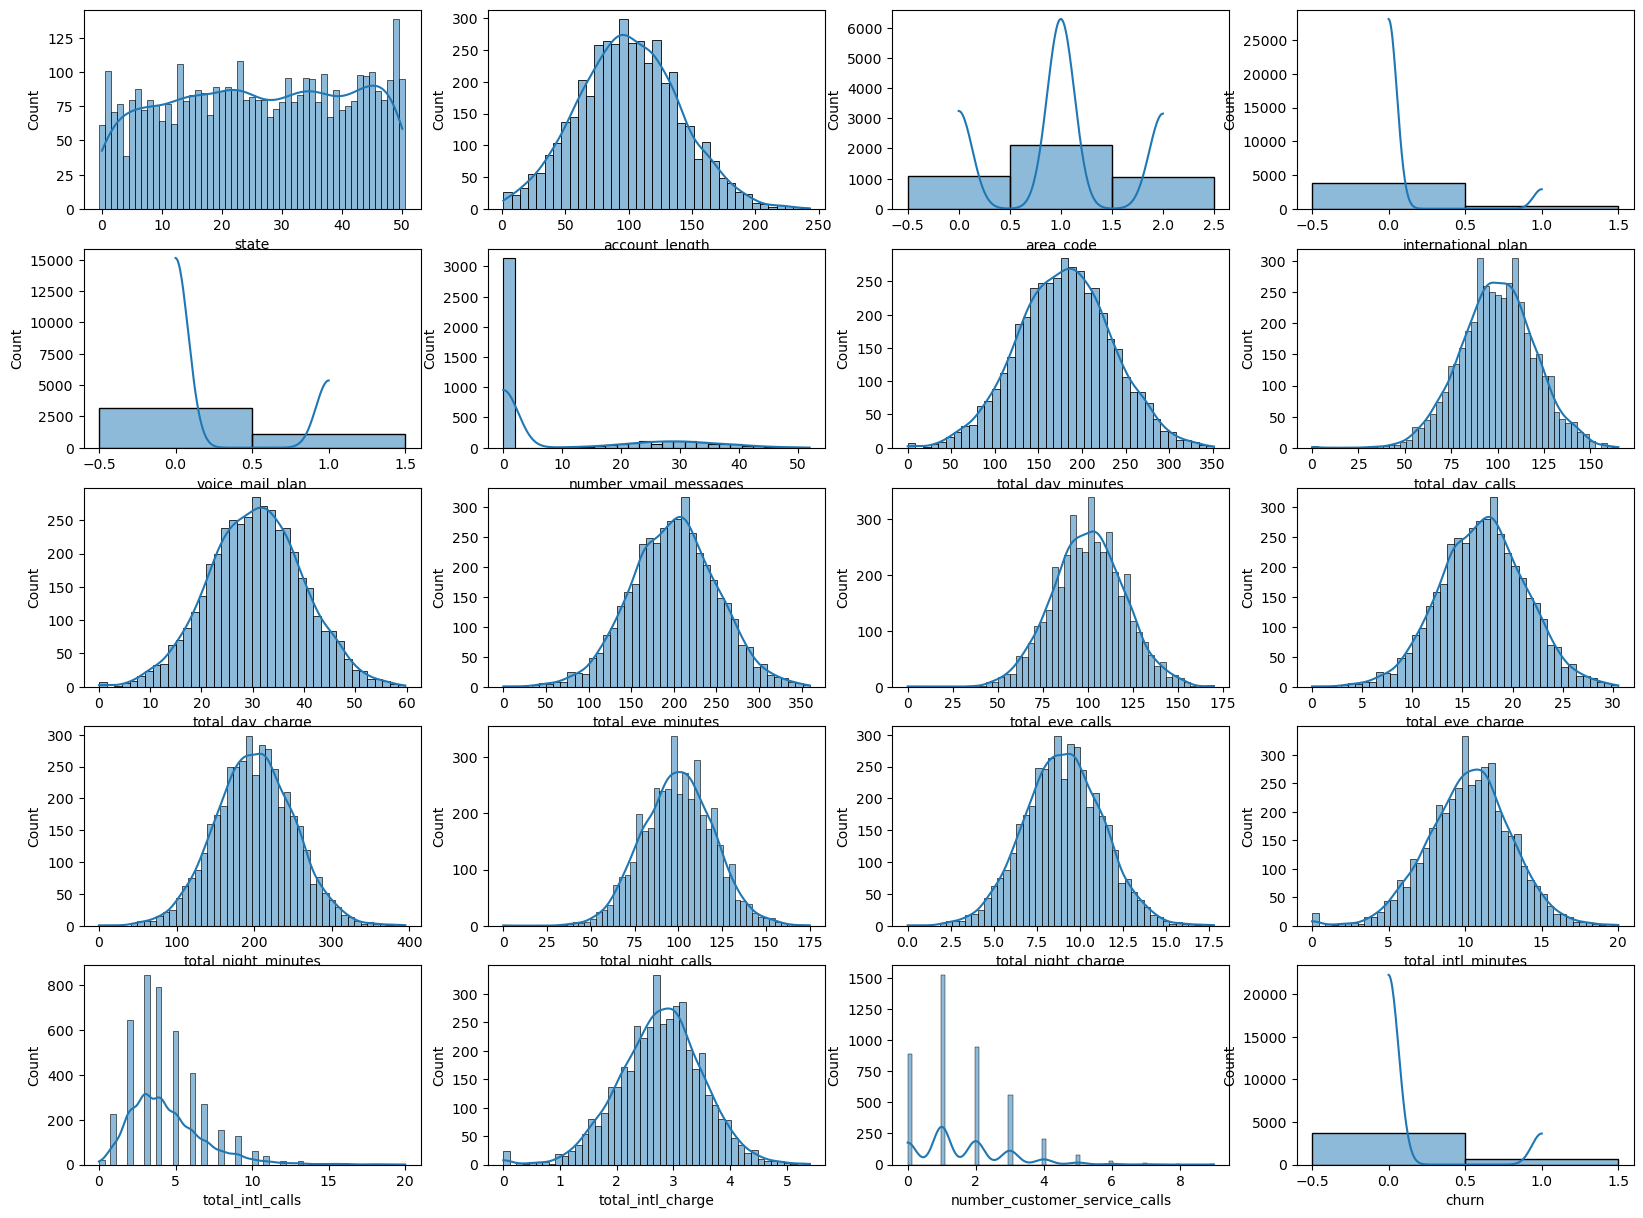

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axs = axs.ravel()
for i, c in enumerate(df.columns):
    sns.histplot(df, x=c, ax = axs[i], kde=True)

# conclusions:
# - most numerical features already follow a normal dist.
# - state is roughty uniform, it might not be useful for prediction
# - binary columns (churn, intl. plan, voice mail plan) are imbalanced
# - number_vmail_messages is bimodal! dist. is skewed, we might want to apply np.log
# - total_intl_calls and customer_service_calls are quite sparse

<AxesSubplot:>

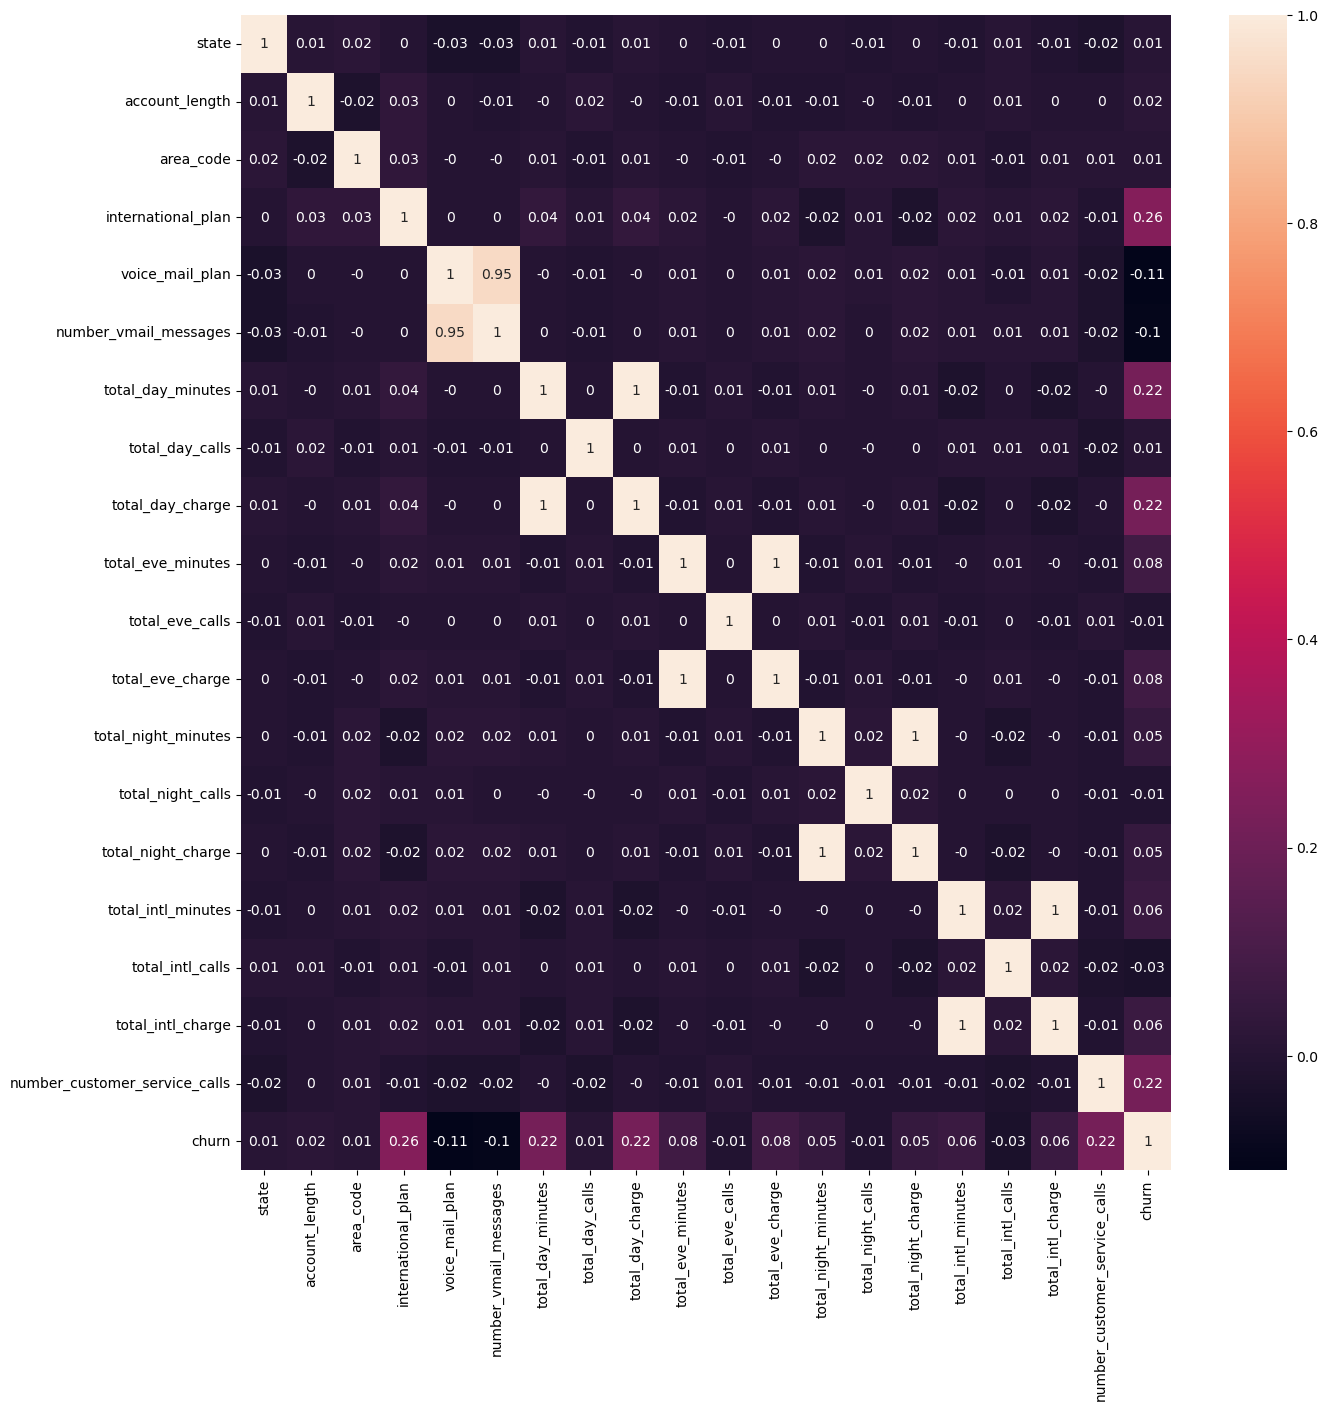

In [ ]:
plt.figure(figsize=(15, 15))
p_corr = df.corr(numeric_only=False, method='pearson')
p_corr=p_corr.round(decimals=2)
sns.heatmap(p_corr, annot=True)

In [ ]:
# first BIVARIATE ANALYSIS observations and conclusions:
# - drop highly(>0.9) correlated features
cols_to_drop = ['number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
df.drop(columns=cols_to_drop, inplace=True)

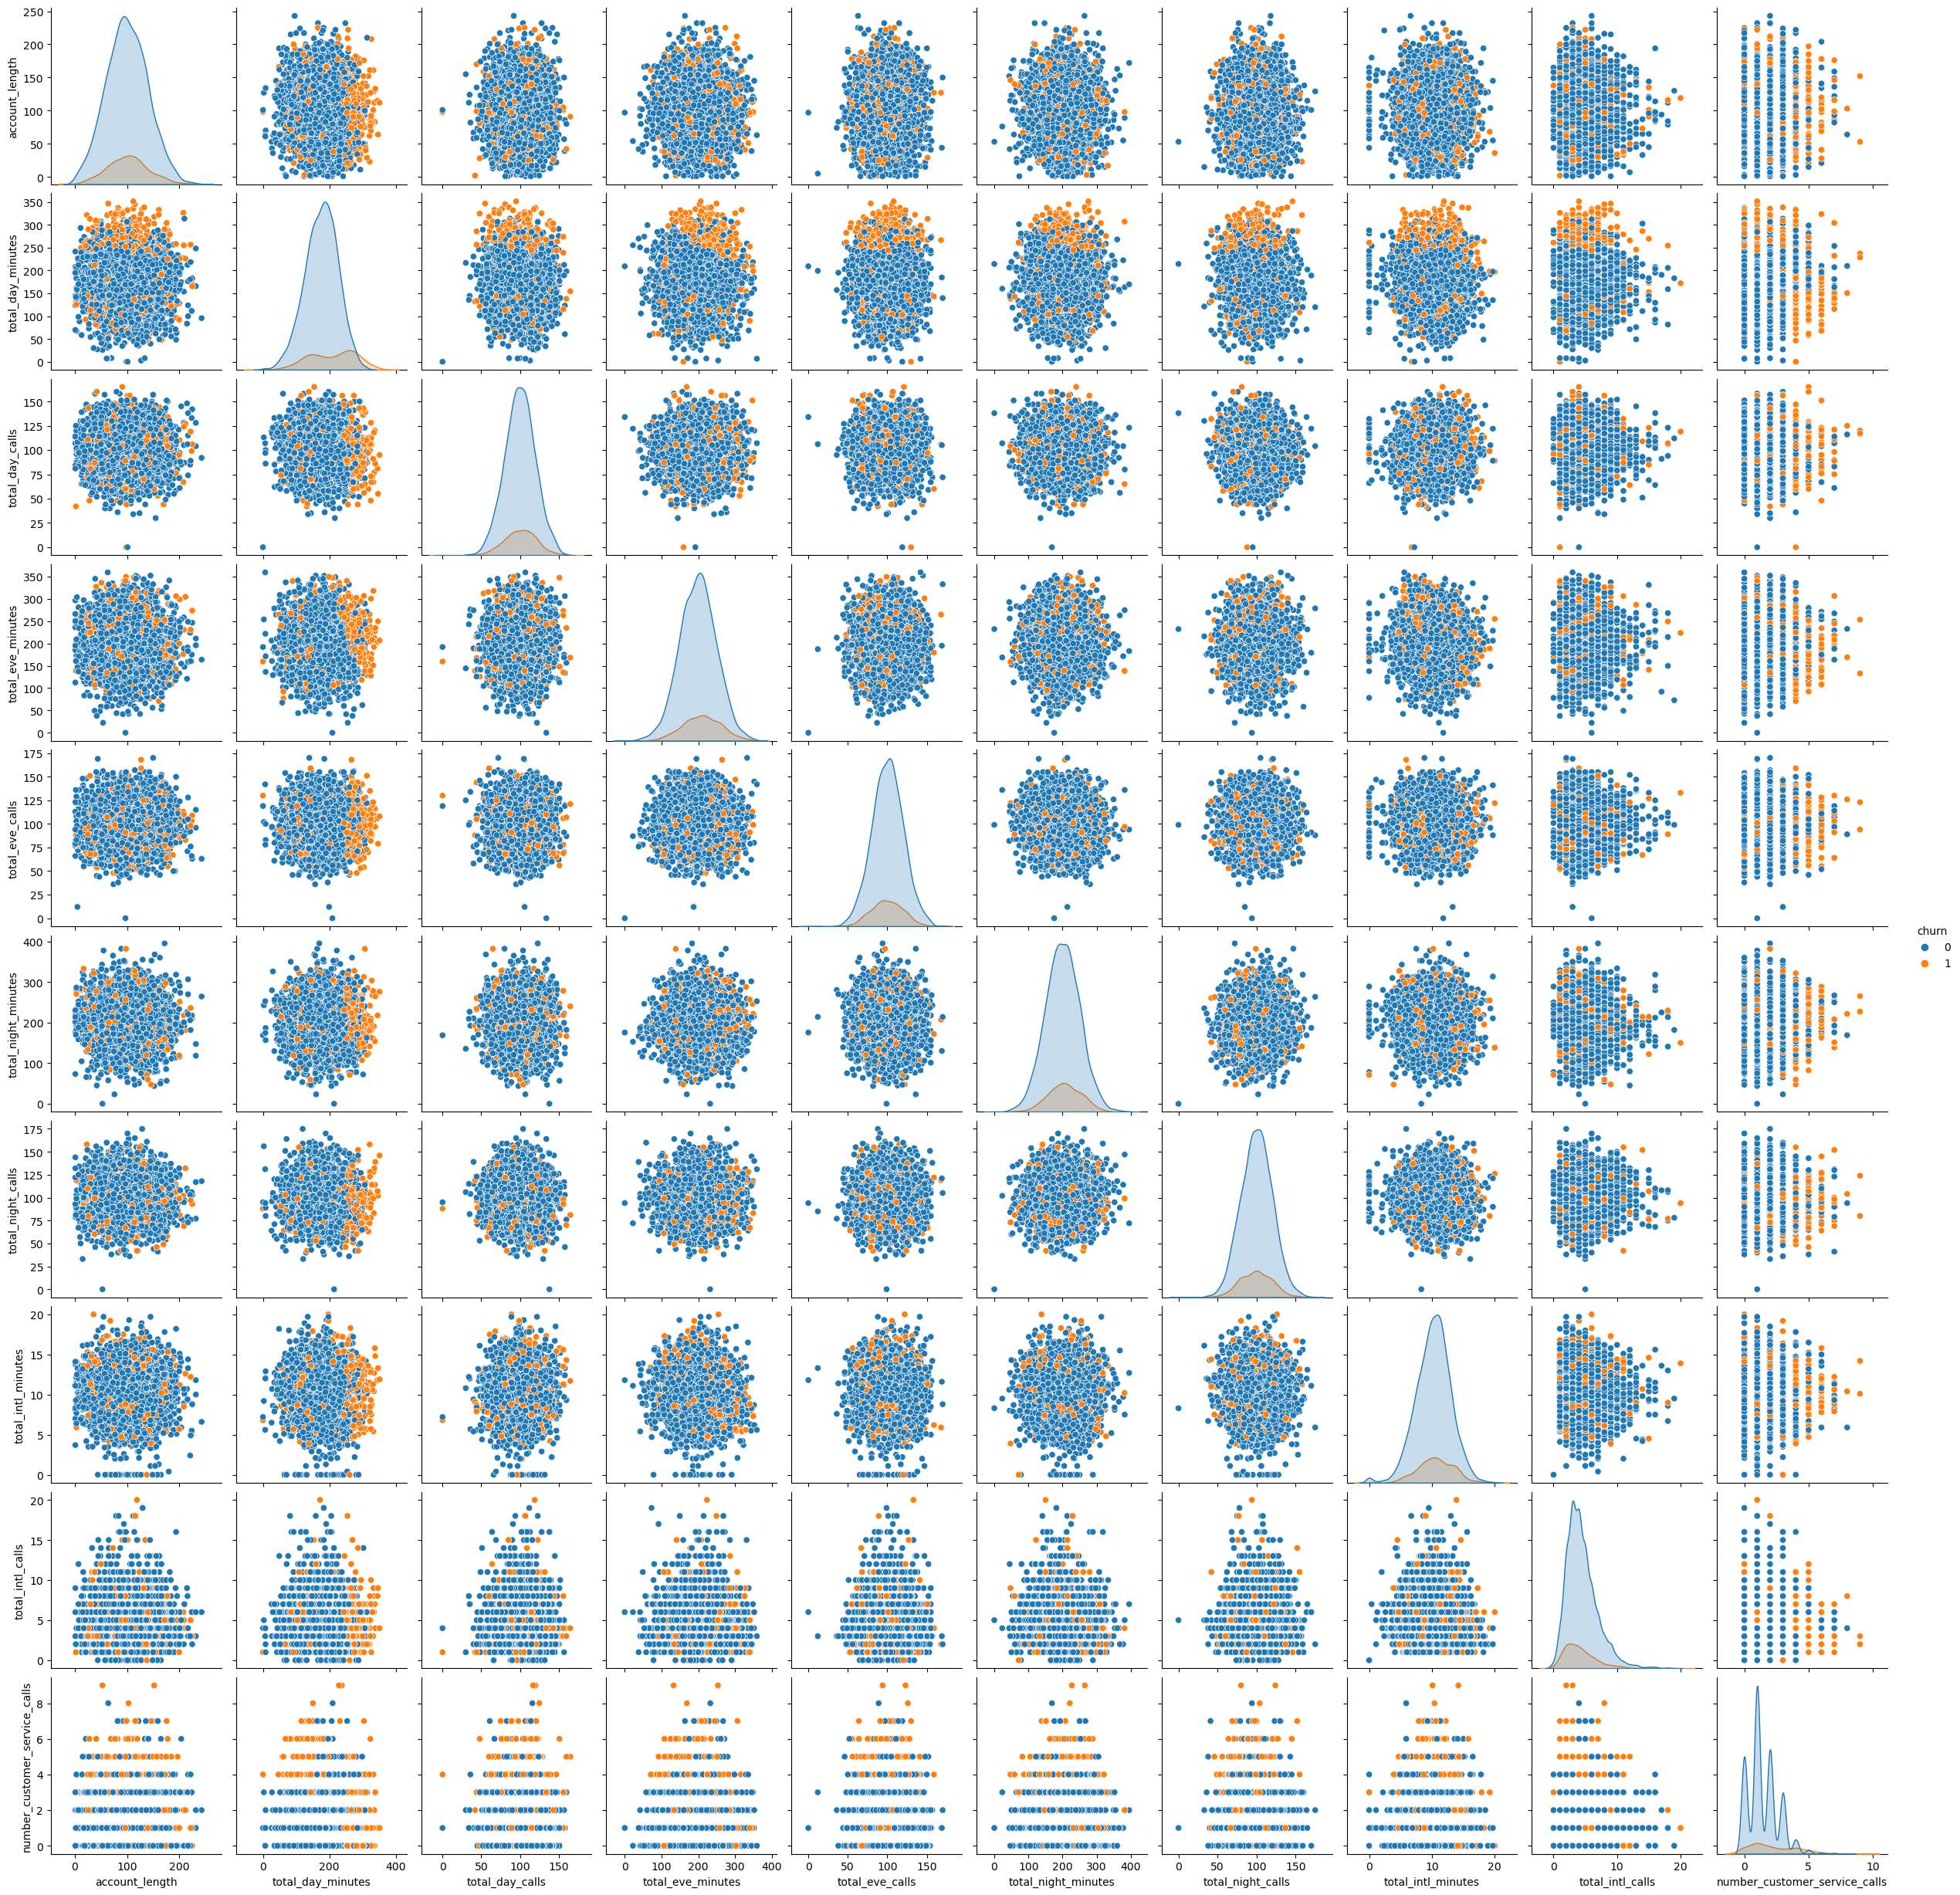

In [ ]:
# df['international_plan'] = df['international_plan'].astype(int)
sns.pairplot(df, hue='churn')

In [ ]:
# BUILDING THE MODEL
X = df.drop(columns=['churn'])
y = df['churn']

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
col_trans = ColumnTransformer(
    [('mms', MinMaxScaler(), [el for el in X.columns if pd.api.types.is_numeric_dtype(X[el])]),
    #  ('lbe', 'passthrough', [el for el in X.columns if pd.api.types.is_categorical_dtype(X[el])])]
     ('lbe', OrdinalEncoder(), [el for el in X.columns if pd.api.types.is_categorical_dtype(X[el])])]
)

pipeline = Pipeline([('col_trans', col_trans), ('clf', RandomForestClassifier(max_depth=10, n_estimators=100, criterion='gini', max_samples=0.67, random_state=RANDOM_STATE))])
# pipeline = Pipeline([('col_trans', col_trans), ('clf', GaussianNB())])

In [ ]:
pipeline

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('mms', MinMaxScaler(),
                                                  ['account_length',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_night_minutes',
                                                   'total_night_calls',
                                                   'total_intl_minutes',
                                                   'total_intl_calls',
                                                   'number_customer_service_calls']),
                                                 ('lbe', OrdinalEncoder(),
                                                  ['state', 'area_code',
                    

In [ ]:
rez_f1 = cross_val_score(pipeline, X, y, cv=kf, scoring=make_scorer(f1_score))
print(rez_f1)
print(np.mean(rez_f1))

[0.8        0.75862069 0.8019802  0.72251309 0.76767677]
0.7701581488713953
